In [26]:

import sys
#os.environ['PATH'] += ':/Library/TeX/texbin'
#sys.path.append('/proj/gowling/GW_tools')
#import GW_tools as g 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sys.path.append('../../')
sys.path.append('/Users/cg411/Documents/PhD/Phd/gwaves_phasetrans/CG/gw_data_tools')
import gwtools as g 
from getdist.mcsamples import loadMCSamples
import matplotlib.pyplot as plt
import getdist as gd
import numpy as np 
print(gd.__file__)
import getdist.plots as gdplt
import os
from cobaya.yaml import yaml_load_file
plt.rcParams.update({'font.size': 50})

def tobs( n_years): 
    yr=365.25*86400.

    return n_years*yr

/Users/cg411/opt/anaconda3/lib/python3.7/site-packages/getdist/__init__.py


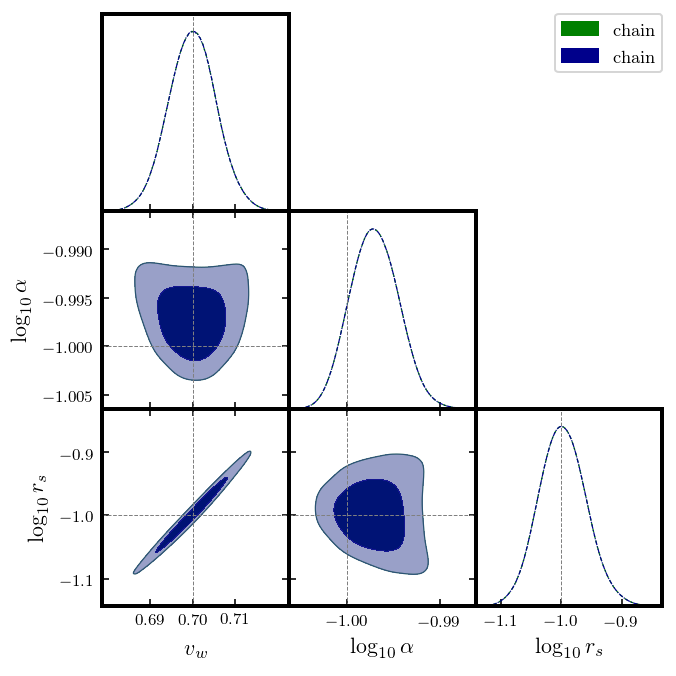

In [27]:
freqs = np.logspace(-5,-1,num=1000,base =10)
sample1 = yaml_load_file('vw0_7alpha0_1rs0_1/ssmtools_vw0_7_al0_1_rs0_1.yaml')
folder1, name1 = os.path.split(os.path.abspath(sample1["output"]))

sample2 = yaml_load_file('vw0_7alpha0_1rs0_1/ssmtools_vw0_7_al0_1_rs0_1_diff_npt.yaml')
folder2, name2 = os.path.split(os.path.abspath(sample2["output"]))

vw = sample1["fiducial"]["vw"]
alpha = sample1["fiducial"]["alpha"]
rs = sample1["fiducial"]["rs"]
fiducial_params =[vw,alpha,rs] 

SNR = g.calc_SNR(freqs, g.calc_omgw0(freqs,fiducial_params[0],fiducial_params[1],fiducial_params[2]),g.LISA_noise_curve_om(freqs),tobs(3))

run_dir = '/Users/cg411/Documents/PhD/Phd/gwaves_phasetrans/CG/MCMC_SSM/gowling/ssmtools_batch'

os.chdir(run_dir)
data_dir = '/Users/cg411/Documents/PhD/Phd/gwaves_phasetrans/CG/MCMC_SSM/gowling/ssmtools_batch/plots/vw_{}alpha{}rs{}'.format(vw,alpha,rs).replace(".","_") + os.sep
#print(data_dir)
save_string = data_dir +'vw_{}alpha{}rs{}_tri_plot'.format(vw,alpha,rs).replace(".","_") +'.png'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print('Made new directory',data_dir)

log10_alpha =np.log10(alpha) 
log10_rs = np.log10(rs)


fiducial = {"vw":vw,"log10_alpha":log10_alpha,"log10_rs":log10_rs}
gdplot = gdplt.getSubplotPlotter(rc_sizes= True,chain_dir=[folder1,folder2],analysis_settings={'ignore_rows': 0.3} )
gdplot.triangle_plot([name1,name2], ["vw", "log10_alpha","log10_rs"], filled=True
                     ,markers=fiducial, line_args=[{'ls':'--', 'color':'green'},
               {'ls':'-.', 'color':'darkblue'}], 
    contour_colors=['green','darkblue'], )